In [2]:
%pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


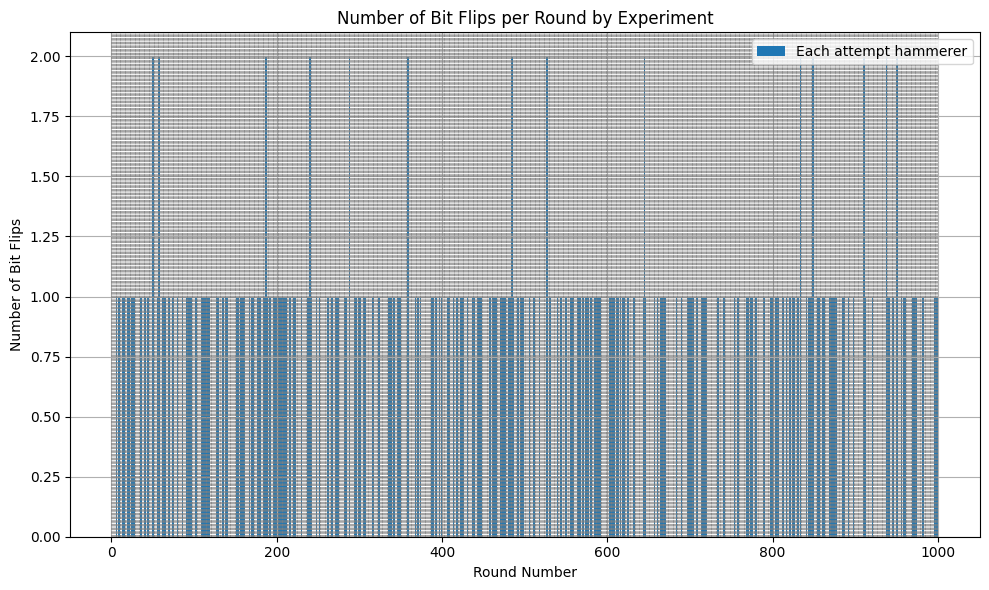

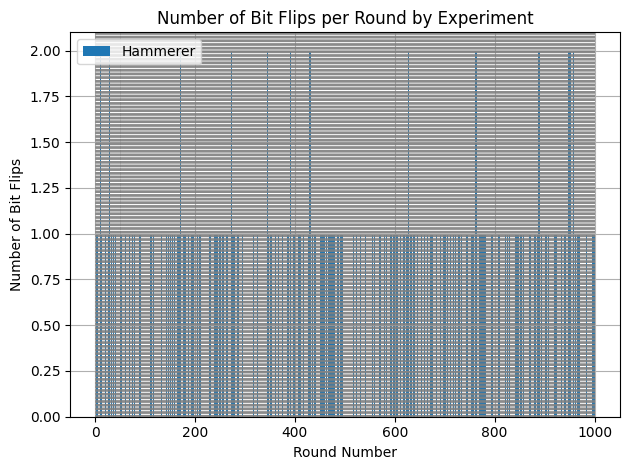

Experiment: Each attempt hammerer (N=1000)
  Average Bit Flips: 0.278
  Median Bit Flips: 0.0
  Maximum Bit Flips: 2
  Minimum Bit Flips: 0
  Standard Deviation of Bit Flips: 0.4782426162524624

Experiment: Hammerer (N=1000)
  Average Bit Flips: 0.261
  Median Bit Flips: 0.0
  Maximum Bit Flips: 2
  Minimum Bit Flips: 0
  Standard Deviation of Bit Flips: 0.48257538271237993



In [1]:
import matplotlib.pyplot as plt
import re
import numpy as np

# Parsing the input data
def parse_data(data):
    experiment_data = {}
    current_experiment = None

    for line in data.splitlines():
        if line.startswith("Hammerer") or line.startswith("Each attempt hammer"):
            current_experiment = line.strip(":")
            experiment_data[current_experiment] = []
        elif "bit_flips" in line:
            match = re.search(r"bit_flips: \[(.*?)\]", line)
            if match:
                flips = match.group(1)
                num_flips = flips.count("addr:")  # Count occurrences of "addr" to determine the number of flips
                experiment_data[current_experiment].append(num_flips)

    return experiment_data

# Plotting the data
def plot_data(experiment_data):
    plt.figure(figsize=(10, 6))

    for experiment, bit_flips in experiment_data.items():
        plt.bar(
            range(0, len(bit_flips)),
            bit_flips,
            label=experiment,
            width=2,
            align='edge'
        )

        plt.title("Number of Bit Flips per Round by Experiment")
        plt.xlabel("Round Number")
        plt.ylabel("Number of Bit Flips")
        plt.legend()
        plt.grid(True)
        for i in range(0,len(bit_flips)):
            plt.axvline(x=i, color='gray', linestyle='--', linewidth=0.5)
            
        plt.tight_layout()
        plt.show()
        
    # Calculate statistics
    for experiment, bit_flips in experiment_data.items():
        std_dev_flips = np.std(bit_flips) if bit_flips else 0
        avg_flips = sum(bit_flips) / len(bit_flips) if bit_flips else 0
        median_flips = np.median(bit_flips) if bit_flips else 0
        max_flips = max(bit_flips) if bit_flips else 0
        min_flips = min(bit_flips) if bit_flips else 0

        print(f"Experiment: {experiment} (N={len(bit_flips)})")
        print(f"  Average Bit Flips: {avg_flips}")
        print(f"  Median Bit Flips: {median_flips}")
        print(f"  Maximum Bit Flips: {max_flips}")
        print(f"  Minimum Bit Flips: {min_flips}")
        print(f"  Standard Deviation of Bit Flips: {std_dev_flips}")
        print()

# Reading data from bench.txt
with open('../bench.txt', 'r') as file:
    sample_data = file.read()

# Main execution
experiment_data = parse_data(sample_data)
plot_data(experiment_data)
